In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy

%cd /usr/local/lib/python3.8/dist-packages/konlpy/java

!jar xvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar

with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 36.1 MB/s eta 0:00:00
/usr/local/lib/python3.8/dist-packages/konlpy/java
  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/proce

In [3]:
data += '여기어때\n데일리호텔\n야놀자\n인터파크투어\n마이리얼트립\n호텔스닷컴\n익스피디아\n에어비앤비\n부킹닷컴\n트리바고\n스카이스캐너\n호텔스컴파인\n아고다\n가성비\n코로나\n최저가\n본인인증\n체크인\n체크아웃\n카카오톡'

with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [4]:
!jar cvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar * 

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/comm/HannanumInterface.class(in = 3352) (out= 1633)(deflated 51%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/komoran/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/komoran/KomoranInterface.class(in = 2460) (out= 1213)(deflated 50%)
adding: bin/kr/lucypark/okt/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/okt/OktInterface.class(in = 3075) (out= 1460)(deflated 52%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkm

In [5]:
import pandas as pd


topic_7 = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_7.csv')

In [6]:
topic_7 = topic_7.drop(columns = ['Unnamed: 0'])

topic_7

,text
0,정말 쓰레기 같은 플랫폼이네 요 자기들이 확인 안 해서 모텔 시간 못 봐놓고 예약했...
1,호텔스닷컴을 통해 예약하고 숙박한 호텔의 수준이 좋지 않아 낮은 평점과 함께 숙박 ...
2,아직도 광고 낚시에 낚여서 이 어플 쓰는 사람들이 있나 출장 및 놀러 다니면서 여러...
3,제가 느낀 대로 후기를 쓰는데 안 좋은 후기는 다 권리 침해 신고로 삭제를 해버리는...
4,지금 며칠 전부터 앱에서 예야 관리만 안 떠 요 자꾸 재시도하라고 함
...,...
712,유튜브 보고 왔는데 가관이 내용 ㅋㅋ
713,처음 접하는 사용자도 쉽고 빠르고 직관적으로 이해할 수 있는 인터페이스 덕분에 편하...
714,너무 좋습니다 얼마 전에 잠실 거리에서 짬 모텔이라는 일반 호텔을 묵어보니 문도 고...
715,야놀자를 가끔 이용합니다 평상시 모텔 이용 가격보다 야놀자 금액을 더 비싸게 받는 ...


In [7]:
import pickle

with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","rb") as f:
    stop_words = pickle.load(f)

In [8]:
!pip install gensim
!pip install wget

import gensim
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
import re
from tqdm import tqdm
import time

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
          if len(word) > 1:
            if word not in stop_words:
              words.append(word)            
    return words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=cd6fab265ef14361fa2d3be131a5977b0e142a836336ba9a55eddacc37342029
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [9]:
topic_7.shape

(717, 1)

In [10]:
tokenized_list = []

for text in tqdm(topic_7['text'][:1530]):                 # 숫자 수정
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 717/717 [00:23<00:00, 31.08it/s]

717
['쓰레기', '플랫폼', '전화', '소리', '우린', '도착', '이야기', '중계', '플랫폼', '책임', '이야기', '무료', '봉사', '대도', '수수료', '대처', '따윈']


In [11]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_7.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_7.reset_index(drop=True, inplace=True)

In [12]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [13]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
wget.download(url)

!unzip mallet-2.0.8.zip

import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/usr/local/lib/python3.8/dist-packages/konlpy/java/mallet-2.0.8/bin/mallet'

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [14]:
import gensim
import gensim.corpora as corpora
from gensim import corpora
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 10 ) #5회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=words_bigram, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 2  has Coherence Value of 0.2726731485153111
Num Topics = 3  has Coherence Value of 0.2748625341614748
Num Topics = 4  has Coherence Value of 0.29627698664001106
Num Topics = 5  has Coherence Value of 0.3296960871993457
Num Topics = 6  has Coherence Value of 0.28614551273989536
Num Topics = 7  has Coherence Value of 0.3557224178083417


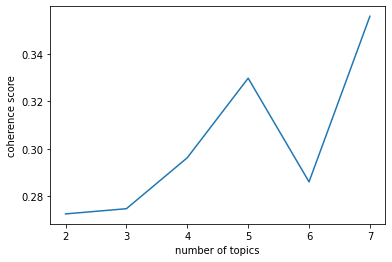

In [45]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=2, limit=8, step=1)

limit=8; start=2; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fro

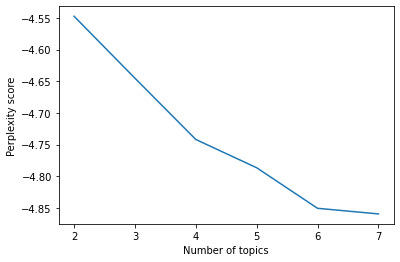

In [46]:
perplexity_values = []
for i in range(2,8): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

x = range(2,8)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [47]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [48]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.000727 -0.000399       1        1  14.487539
3     -0.000202 -0.000826       2        1  14.373004
6      0.000928  0.000518       3        1  14.330688
0     -0.000079 -0.000049       4        1  14.313382
1      0.000661  0.000137       5        1  14.188426
2     -0.001140 -0.000421       6        1  14.183017
4     -0.000895  0.001041       7        1  14.123943, topic_info=   Term       Freq      Total Category  logprob  loglift
54   설정  37.000000  37.000000  Default  30.0000  30.0000
1   수수료  34.000000  34.000000  Default  29.0000  29.0000
89   제휴  36.000000  36.000000  Default  28.0000  28.0000
68  시스템  35.000000  35.000000  Default  27.0000  27.0000
86   친절  35.000000  35.000000  Default  26.0000  26.0000
..  ...        ...        ...      ...      ...      ...
77   연결   5.580184  37.797672   Topic7  -4.6847   0.0443
94   운영   5.668368  39.445686   Topic7  -4.6690   0.0173
26   리뷰   5.500910  37.525055   Topic7  -4.6990   0.0372
30   가격   5.440816  37.968466   Topic7  -4.7100   0.0145
22   사기   5.391309  36.688569   Topic7  -4.7192   0.0396

[291 rows x 6 columns], token_table=      Topic      Freq Term
term                      
30        1  0.131688   가격
30        2  0.131688   가격
30        3  0.158026   가격
30        4  0.131688   가격
30        5  0.158026   가격
...     ...       ...  ...
17        3  0.140198   후기
17        4  0.140198   후기
17        5  0.112159   후기
17        6  0.140198   후기
17        7  0.140198   후기

[819 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 7, 1, 2, 3, 5])

In [49]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=20)                            #이거 숫자 바꿈
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, topic_7['text']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
140,140,0.0,0.1959,"후기, 사진, 신고, 참고, 권리_침해, 검색, 수준, 작성, 차단, 댓글, 사이트...",요즘 너무도 많은 사이트들이 있지만 늘 예약하게 되는데 일리 호텔 가격도 리얼 후기...
306,306,0.0,0.1662,"후기, 사진, 신고, 참고, 권리_침해, 검색, 수준, 작성, 차단, 댓글, 사이트...",소비자가 정당한 후기를 남겼을 뿐인데 권리 침해라는 말도 안 되는 이유로 댓 삭이라...
111,111,0.0,0.1693,"후기, 사진, 신고, 참고, 권리_침해, 검색, 수준, 작성, 차단, 댓글, 사이트...",데일리호텔을 몇 년 전부터 쓰고 있는데 정말 만족스럽습니다 구체적으로 말씀드리면 우...
112,112,0.0,0.1429,"후기, 사진, 신고, 참고, 권리_침해, 검색, 수준, 작성, 차단, 댓글, 사이트...",필요할 때 요긴하게 쓸 만함 호텔이나 모텔은 취사가 안 돼서 불편한 데에 어기엔 비...
556,556,0.0,0.2146,"후기, 사진, 신고, 참고, 권리_침해, 검색, 수준, 작성, 차단, 댓글, 사이트...",바른 후기 문제 많음 모텔 이용 후 이용자의 후기를 업체 사장이 권리 침해 블라인드...
...,...,...,...,...,...
315,315,6.0,0.1709,"업체, 고객, 상담, 사항, 책임, 입장, 요청, 규정, 응대, 중개, 쓰레기, 직...",진짜 갑질 제대로 하는 쓰레기 업체 취소 환불이 당일 안 되는 건 알고 있었음다만 ...
308,308,6.0,0.1772,"업체, 고객, 상담, 사항, 책임, 입장, 요청, 규정, 응대, 중개, 쓰레기, 직...",데일리 이용해서 호텔 예약 시 가격 혜택이 많은 듯해요 호텔뿐 아니라 놀이공원 음식...
125,125,6.0,0.1935,"업체, 고객, 상담, 사항, 책임, 입장, 요청, 규정, 응대, 중개, 쓰레기, 직...",예약은 편한데 불만사항이나 개선사항 요청할 수 있는 상담 시스템이 전무 후기도 안 ...
473,473,6.0,0.2315,"업체, 고객, 상담, 사항, 책임, 입장, 요청, 규정, 응대, 중개, 쓰레기, 직...",고객센터는 전화하면 분을 기다리고 환불 규정 아니 숙박업체 하고 환불하기로 이야기가...


In [50]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "text", "Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num", "Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'] +1
df_topic_review.Dominant_Topic = df_topic_review.Dominant_Topic.astype(str)
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'].str.split('.').str[0]

In [51]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"후기, 사진, 신고, 참고, 권리_침해, 검색, 수준, 작성, 차단, 댓글, 사이트...",140,0.2009
1.0,2,"환불, 숙박업소, 결제, 사용자, 할인, 선택, 비교, 이벤트, 소리, 금액, 호스...",116,0.1664
2.0,3,"가격, 관리, 고객_센터, 수정, 평점, 신뢰, 제공, 기능, 투숙, 반영, 보기,...",116,0.1664
3.0,4,"운영, 내용, 정보, 광고, 전화, 플랫폼, 처리, 경험, 사기, 문의, 조치, 주...",82,0.1176
4.0,5,"리뷰, 개선, 이용자, 이유, 포인트, 시스템, 냄새, 만족도, 오류, 혜택, 쿠폰...",95,0.1363
5.0,6,"서비스, 취소, 소비자, 때문, 업주, 연락, 수수료, 회사, 답변, 손님, 기준,...",83,0.1191
6.0,7,"업체, 고객, 상담, 사항, 책임, 입장, 요청, 규정, 응대, 중개, 쓰레기, 직...",65,0.0933
